In [2]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#Imoprt data from the csv file
data = pd.read_csv('diabetes_dataset.csv')

In [4]:
# Separate the features and the target
x = data.iloc[:, :-1]
target = data.iloc[:, -1]
print("Size of feature: ",x.shape)
print("Size of target: ",target.shape)

Size of feature:  (768, 8)
Size of target:  (768,)


In [5]:
#Normalize the feature
x_normal = x - np.mean(x, axis=0)

In [6]:
#Calculate the Covariance matrix
Sx = (1/(len(x_normal)-1))*np.dot(x_normal.T,x_normal)
print("Size of covariance matrix: ",Sx.shape)

Size of covariance matrix:  (8, 8)


In [7]:
#Calculate eigenvalues & eigenvectors
eigenvalues, eigenvector = np.linalg.eig(Sx)

In [8]:
#Sort the eigenvalues and corresponding eigenvector

#Find the indices in descending order
indices = np.argsort(eigenvalues)[::-1] 

# Sort using the indices
sorted_eigenvalues = eigenvalues[indices]
sorted_eigenvector = eigenvector[:, indices]

In [9]:
np.set_printoptions(suppress=True, precision=4)
print("Eigenvalues\n", np.reshape(sorted_eigenvalues,(len(eigenvalues),1)))

Eigenvalues
 [[13456.573 ]
 [  932.7601]
 [  390.5778]
 [  198.1827]
 [  112.6891]
 [   45.8294]
 [    7.7607]
 [    0.1029]]


In [10]:
#Variance of eigenvalues
total_var = np.sum(sorted_eigenvalues)
var_prop = (sorted_eigenvalues / total_var) * 100

print("Variance proportion\n",np.reshape(var_prop,(len(var_prop),1)))
print("\nTotal variance: ",np.sum(var_prop))

Variance proportion
 [[88.8547]
 [ 6.1591]
 [ 2.579 ]
 [ 1.3086]
 [ 0.7441]
 [ 0.3026]
 [ 0.0512]
 [ 0.0007]]

Total variance:  100.0


In [11]:
#Compute output
y = np.dot(sorted_eigenvector.T,x_normal.T).T
print("Size of output: ",y.shape)

Size of output:  (768, 8)


In [12]:
#Covaraince matrix of output
Sy = (1/(len(y)-1))*np.dot(y.T,y)

np.set_printoptions(suppress=False, precision=4)
print("Size of covariance matrix: ",Sy.shape)
print("\nCovaraince matrix (first two rows)\n",Sy[[0,1],:])

Size of covariance matrix:  (8, 8)

Covaraince matrix (first two rows)
 [[ 1.3457e+04 -2.0775e-12 -5.2649e-13 -2.2957e-12 -5.9289e-13  1.8617e-13
  -2.2396e-13 -6.1809e-14]
 [-2.0775e-12  9.3276e+02 -2.2008e-12 -4.4252e-13 -1.5030e-13 -9.1898e-14
   1.4730e-13 -2.1590e-14]]


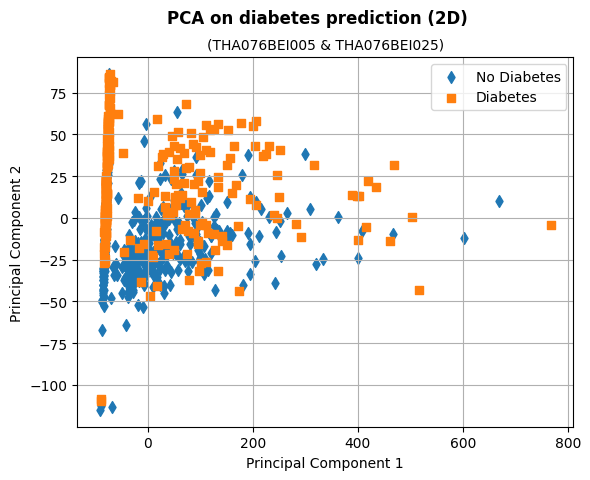

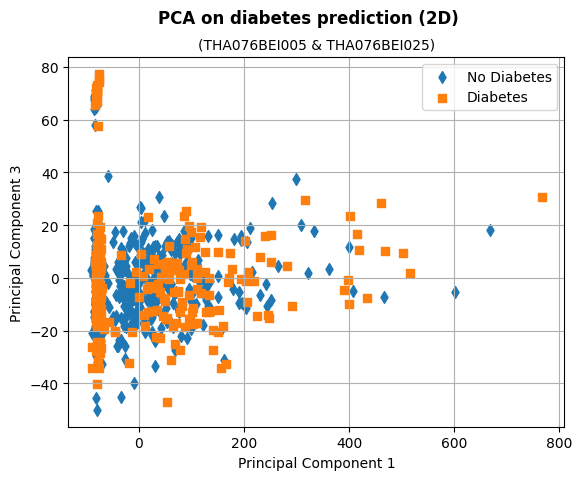

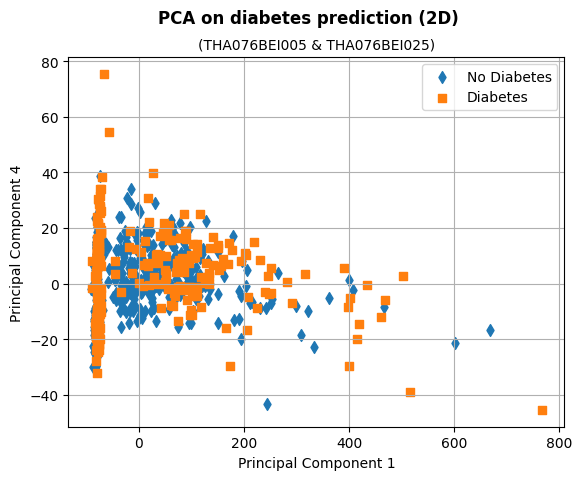

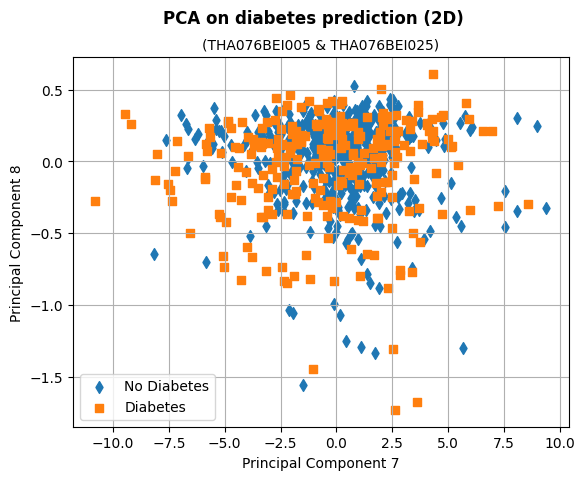

In [17]:
# Define the combination for 2D plot
combination_2d = [(0, 1), (0, 2), (0, 3), (6, 7)]

#Loop through the combiantion for scatter plot
for i, (pc1, pc2) in enumerate(combination_2d):
    plt.figure()

    plt.scatter(y[target == 0, pc1], y[target == 0, pc2], marker='d', label='No Diabetes')
    plt.scatter(y[target == 1, pc1], y[target == 1, pc2], marker='s', label='Diabetes')

    plt.suptitle('PCA on diabetes prediction (2D)', fontsize=12, fontweight='bold')
    plt.title("(THA076BEI005 & THA076BEI025)", fontsize=10)
    plt.xlabel(f'Principal Component {pc1+1}')
    plt.ylabel(f'Principal Component {pc2+1}')
    plt.grid(True)
    plt.legend()
    plt.show()

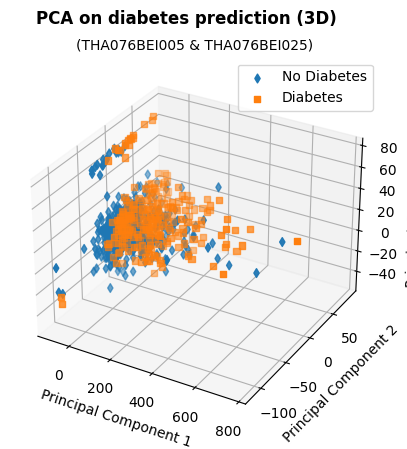

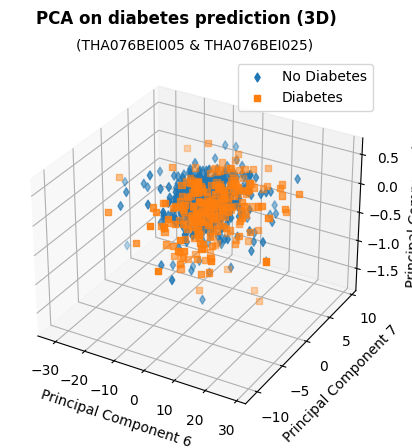

In [18]:
# Define the combination for 3Dplot
combination_3d = [(0, 1, 2), (5, 6, 7)]

#Loop through the combiantion for scatter plot
for i, (pc1, pc2, pc3) in enumerate(combination_3d):
    ax = plt.axes(projection='3d')

    ax.scatter(y[target == 0, pc1], y[target == 0, pc2], y[target == 0, pc3], marker='d', label='No Diabetes')
    ax.scatter(y[target == 1, pc1], y[target == 1, pc2], y[target == 1, pc3], marker='s', label='Diabetes')

    plt.suptitle('PCA on diabetes prediction (3D)', fontsize=12, fontweight='bold')
    ax.set_title("(THA076BEI005 & THA076BEI025)", fontsize=10)
    ax.set_xlabel(f'Principal Component {pc1+1}')
    ax.set_ylabel(f'Principal Component {pc2+1}')
    ax.set_zlabel(f'Principal Component {pc3+1}')
    ax.legend()
    plt.show()